## **Miniconda installation on Google Colab**

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:10
🔁 Restarting kernel...


## **Installing PyVista and libgl1 for rendering and displaying 3D output**

In [2]:
!apt-get install -qq xvfb libgl1-mesa-glx
!pip install pyvista -qq

Selecting previously unselected package libfontenc1:amd64.
(Reading database ... 120831 files and directories currently installed.)
Preparing to unpack .../0-libfontenc1_1%3a1.1.4-1build3_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-1build3) ...
Selecting previously unselected package libgl1-mesa-glx:amd64.
Preparing to unpack .../1-libgl1-mesa-glx_23.0.4-0ubuntu1~22.04.1_amd64.deb ...
Unpacking libgl1-mesa-glx:amd64 (23.0.4-0ubuntu1~22.04.1) ...
Selecting previously unselected package libxfont2:amd64.
Preparing to unpack .../2-libxfont2_1%3a2.0.5-1build1_amd64.deb ...
Unpacking libxfont2:amd64 (1:2.0.5-1build1) ...
Selecting previously unselected package libxkbfile1:amd64.
Preparing to unpack .../3-libxkbfile1_1%3a1.1.0-1build3_amd64.deb ...
Unpacking libxkbfile1:amd64 (1:1.1.0-1build3) ...
Selecting previously unselected package x11-xkb-utils.
Preparing to unpack .../4-x11-xkb-utils_7.7+5build4_amd64.deb ...
Unpacking x11-xkb-utils (7.7+5build4) ...
Selecting previously unselec

## **Cloning gprMax devel branch into Colab**

In [1]:
!git clone --branch devel https://github.com/gprMax/gprMax.git

Cloning into 'gprMax'...
remote: Enumerating objects: 15743, done.
remote: Counting objects: 100% (2954/2954), done.
remote: Compressing objects: 100% (433/433), done.
remote: Total 15743 (delta 2583), reused 2791 (delta 2512), pack-reused 12789
Receiving objects: 100% (15743/15743), 197.83 MiB | 26.38 MiB/s, done.
Resolving deltas: 100% (11009/11009), done.
Updating files: 100% (363/363), done.


## **Cloning 3D visualization script into Colab**

In [4]:
!wget https://raw.githubusercontent.com/srutanik/GSoC_23/main/visualization_toolbox/plot_3D_model.py

--2023-08-30 11:10:36--  https://raw.githubusercontent.com/srutanik/GSoC_23/main/visualization_toolbox/plot_3D_model.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5116 (5.0K) [text/plain]
Saving to: ‘plot_3D_model.py’

plot_3D_model.py    100%[===================>]   5.00K  --.-KB/s    in 0s      

2023-08-30 11:10:36 (72.3 MB/s) - ‘plot_3D_model.py’ saved [5116/5116]



## **Creating the gprMax-devel conda environment**

The `&> /dev/null` at the end is used to mute the output of the cell since we don't require to view any output here. If needed, one can view the whole process by deleting this part.

In [4]:
!cd gprMax && conda env create -f conda_env.yml &> /dev/null

## **Activating the gprMax-devel environment and installing gprMax**

In [5]:
!source activate gprMax-devel && pip install -e gprMax

Obtaining file:///content/gprMax
  Preparing metadata (setup.py) ... done
  Running setup.py develop for gprMax


## **Creating input file of the A Scan model**

In [6]:
%%writefile cylinder_Ascan_2D.in
#title: A-scan from a metal cylinder buried in a dielectric half-space
#domain: 0.240 0.210 0.002
#dx_dy_dz: 0.002 0.002 0.002
#time_window: 3e-9

#material: 6 0 1 0 half_space

#waveform: ricker 1 1.5e9 my_ricker
#hertzian_dipole: z 0.100 0.170 0 my_ricker
#rx: 0.140 0.170 0

#box: 0 0 0 0.240 0.170 0.002 half_space
#cylinder: 0.120 0.080 0 0.120 0.080 0.002 0.010 pec

#geometry_view: 0 0 0 0.240 0.210 0.002 0.002 0.002 0.002 cylinder_half_space n

Writing cylinder_Ascan_2D.in


## **Activate the conda environment and run the model**

In [7]:
!source activate gprMax-devel && python -m gprMax cylinder_Ascan_2D.in


=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v4.0.0b0 (Càrn Mòr)

 Copyright (C) 2015-2023: The University of Edinburgh, United Kingdom
 Authors: Craig Warren, Antonis Giannopoulos, and John Hartley

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General

## **Import necessary dependencies for 3D output**

In [2]:
import pyvista as pv
pv.start_xvfb()

## **Use the `visualize_vti_output` function from `plot_3D_model.py` file to see the 3D output of the model**


gprMax version: 4.0.0b0


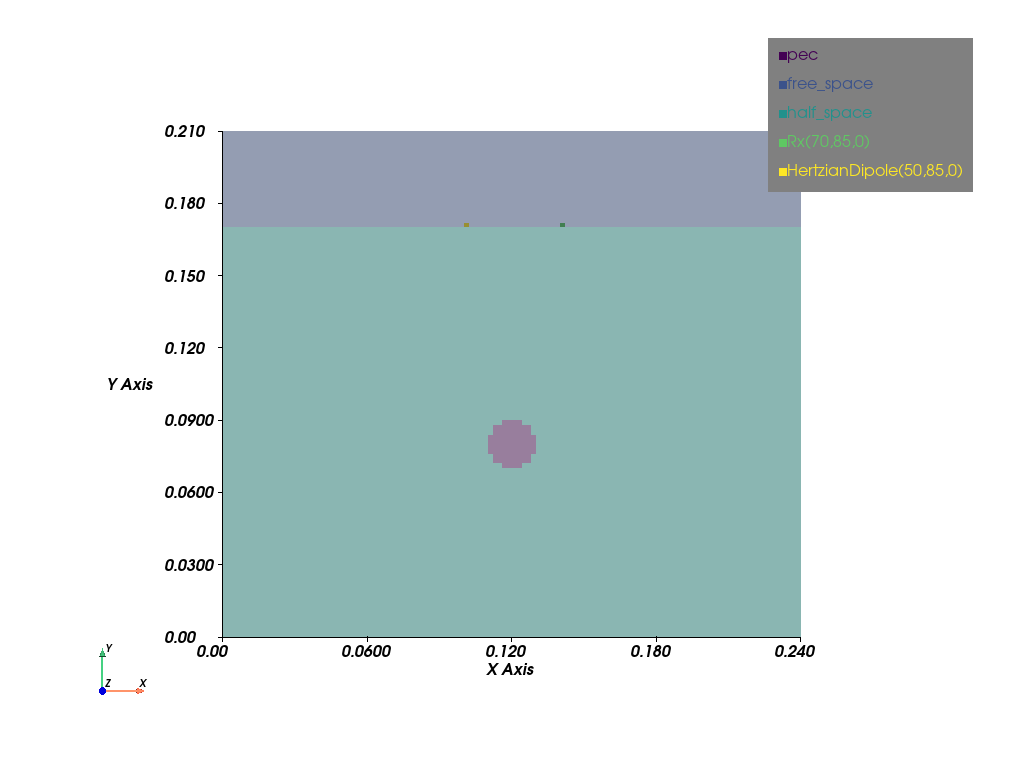

In [3]:
from plot_3D_model import visualize_vti_output
visualize_vti_output(filename = "cylinder_half_space.vti", orientation="xy", opacity = 0.3, backend = 'static')